<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/INTERFACE/PRUEBA_INTERFACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lectura de librerías
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ETL2.xlsx')
df.head(10) #Esta función devuelve las primeras n filas del objeto según la posición.

,Edad,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC,Nivel de educación
0,Entre 50 y 59 años,1.50,65.0,3,26,52,28.888889,Posgrados
1,Entre 20 y 29 años,1.65,61.0,0,26,49,22.405877,Universitario y terciario completo
2,Entre 40 y 49 años,1.52,105.0,22,29,68,45.446676,Universitario incompleto o terciario incompleto
3,Entre 20 y 29 años,1.60,54.0,1,26,42,21.093750,Posgrados
4,Entre 40 y 49 años,1.65,64.0,5,24,45,23.507805,Posgrados
5,Entre 50 y 59 años,1.51,67.0,2,20,51,29.384676,Secundario incompleto
6,Entre 50 y 59 años,1.74,94.0,15,25,96,31.047695,Universitario y terciario completo
7,Entre 40 y 49 años,1.54,82.0,5,26,52,34.575814,Universitario incompleto o terciario incompleto
8,Entre 30 y 39 años,1.60,51.0,31,34,69,19.921875,Universitario incompleto o terciario incompleto
9,Entre 30 y 39 años,1.60,69.0,8,31,81,26.953125,Posgrados


In [4]:
#Visualización de los atributos
df.columns

Index(['Edad', 'Altura', 'Peso', 'BECK ', 'STAI.ANSIEDAD', 'BULLIT', 'IMC',
       'Nivel de educación'],
      dtype='object')

In [5]:
#Cuenta los valores nulos para cada columna
df.isna().sum()

Edad                  0
Altura                0
Peso                  0
BECK                  0
STAI.ANSIEDAD         0
BULLIT                0
IMC                   0
Nivel de educación    0
dtype: int64

In [6]:
#Total de valores nulos
df.isnull().values.sum()

0

In [7]:
# Eliminación de valores nulos en caso de tenerlos
df = df.dropna()

In [8]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                74 non-null     object 
 1   Altura              74 non-null     float64
 2   Peso                74 non-null     float64
 3   BECK                74 non-null     int64  
 4   STAI.ANSIEDAD       74 non-null     int64  
 5   BULLIT              74 non-null     int64  
 6   IMC                 74 non-null     float64
 7   Nivel de educación  74 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 5.2+ KB


In [9]:
#Permite obtener los estadísticos descriptivos
df.describe()

,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.625811,70.381081,10.405405,25.216216,59.324324,26.585722
std,0.065835,16.652654,9.367561,3.508386,20.453829,5.834378
min,1.440000,45.000000,0.000000,19.000000,33.000000,16.528926
25%,1.592500,58.000000,3.000000,23.000000,44.000000,22.146735
50%,1.625000,66.500000,8.000000,25.000000,53.500000,25.233893
75%,1.657500,80.000000,15.750000,27.000000,70.500000,29.865328
max,1.780000,125.000000,42.000000,34.000000,128.000000,45.446676


In [10]:
df.corr()

,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC
Altura,1.000000,0.359658,0.224914,0.152838,0.329913,-0.012133
Peso,0.359658,1.000000,0.361504,0.099369,0.523422,0.924868
BECK,0.224914,0.361504,1.000000,0.532070,0.540307,0.299246
STAI.ANSIEDAD,0.152838,0.099369,0.532070,1.000000,0.423560,0.048181
BULLIT,0.329913,0.523422,0.540307,0.423560,1.000000,0.413068
IMC,-0.012133,0.924868,0.299246,0.048181,0.413068,1.000000


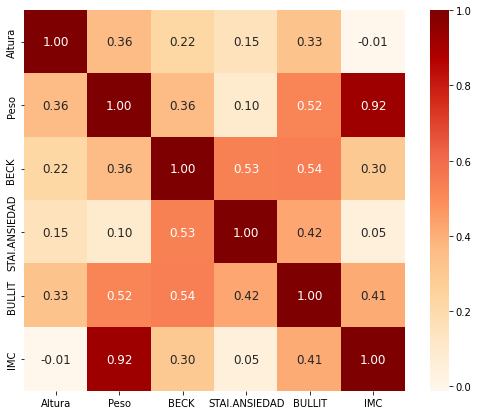

In [16]:
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'OrRd')
#color de blanco a rojo 

In [18]:
import altair as alt
chart = alt.Chart(df) #El objeto fundamental en Altair es Chart, el cual toma un "data frame" como su único argumento

In [19]:
alt.Chart(df).mark_point()
alt.Chart(df).mark_point().encode(
  y='Nivel de educación',
)

alt.Chart(...)

In [22]:
alt.Chart(df).mark_point().encode(
    alt.X('IMC'),
    alt.Y('Nivel de educación')
)

alt.Chart(...)

In [23]:
alt.Chart(df).mark_point().encode(
    x='average(IMC)',
    y='Nivel de educación'
)

alt.Chart(...)

In [25]:
alt.Chart(df).mark_point(color='firebrick').encode(
  alt.X('IMC', scale=alt.Scale(type='log'), axis=alt.Axis(title='IMC')),
  alt.Y('Nivel de educación', axis=alt.Axis(title='Nivel de educación')),
)

alt.Chart(...)

In [27]:
line = alt.Chart(df).mark_line().encode(
    alt.X('IMC', axis=alt.Axis(title='IMC')),
    alt.Y('average(Nivel de educación)', axis=alt.Axis(title='Nivel de educación'))
)

point = alt.Chart(df).mark_circle().encode(
    alt.X('IMC'),
    alt.Y('average(Nivel de educación)')
)

line + point

alt.LayerChart(...)

In [43]:
abc = alt.Chart(df).mark_point().encode(
    alt.X('IMC', axis=alt.Axis(title='IMC')),
    alt.Y('Peso', axis=alt.Axis(title='Peso')),
    color='Edad'
).interactive()

acb = alt.Chart(df).mark_point().encode(
    alt.X('IMC', axis=alt.Axis(title='IMC')),
    alt.Y('BULLIT', axis=alt.Axis(title='BULLIT')),
    color='Edad'
).interactive()

(abc) | (acb)

alt.HConcatChart(...)

In [34]:
from vega_datasets import data  # importar vega_datasets
cars = data.cars()              # Cargar "cars data" como un data frame de Pandas
cars.head()                     # Mostrar las primeras 5 filas

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [36]:
import altair as alt

In [37]:
# crear un "brush selection" de intervalos sobre una codificación del eje x
brush = alt.selection_interval(encodings=['x'])

# determinar la opacidad en base al "brush selection"
opacity = alt.condition(brush, alt.value(0.9), alt.value(0.1))

# un histograma general de los coches por año
# añade el barrido de intervalos para seleccionar los coches a lo largo del tiempo

overview = alt.Chart(cars).mark_bar().encode(
    alt.X('Year:O', timeUnit='year',   # extrae "year" unit, tratar como ordinal
      scale=alt.Scale(rangeStep=None), # subdividir el ancho por defecto de la gráfica
      axis=alt.Axis(title=None, labelAngle=0) # no colocar "title", sin "label angle"
    ),
    alt.Y('count()', title=None), # Contar, no colocar "axis title"
    opacity=opacity
).add_selection(
    brush     # añadir "brush selection" a la gráfica
).properties(
    height=50 # ajustar la altura por defecto de la gráfica a 50 pixels
)

# una  detallada gráfica de dispersión de caballos de fuerza vs. millaje
# modular la opacidad de los puntos en base a la "brush selection"
detail = alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', axis=alt.Axis(title='Caballos de Fuerza')),
    alt.Y('Miles_per_Gallon', axis=alt.Axis(title='Millas por Galón')),
    # set opacity based on brush selection
    opacity=opacity
)

# vertically concatenate (vconcat) charts using the '&' operator
graf = overview & detail
graf

SchemaValidationError: ignored